In [1]:
# we import allrequired libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../Resources/BRCA.csv')

In [3]:
df.head()

,Patient_ID,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status
0,TCGA-D8-A1XD,36.0,FEMALE,0.080353,0.42638,0.54715,0.273680,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,15-Jan-17,19-Jun-17,Alive
1,TCGA-EW-A1OX,43.0,FEMALE,-0.420320,0.57807,0.61447,-0.031505,II,Mucinous Carcinoma,Positive,Positive,Negative,Lumpectomy,26-Apr-17,09-Nov-18,Dead
2,TCGA-A8-A079,69.0,FEMALE,0.213980,1.31140,-0.32747,-0.234260,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,08-Sep-17,09-Jun-18,Alive
3,TCGA-D8-A1XR,56.0,FEMALE,0.345090,-0.21147,-0.19304,0.124270,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,25-Jan-17,12-Jul-17,Alive
4,TCGA-BH-A0BF,56.0,FEMALE,0.221550,1.90680,0.52045,-0.311990,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,06-May-17,27-Jun-19,Dead


In [4]:
df.dropna(inplace = True)


In [5]:
df.shape

(317, 16)

In [6]:
df.describe()

,Age,Protein1,Protein2,Protein3,Protein4
count,317.000000,317.000000,317.000000,317.000000,317.000000
mean,58.725552,-0.027232,0.949557,-0.095104,0.006713
std,12.827374,0.543858,0.906153,0.589027,0.625965
min,29.000000,-2.144600,-0.978730,-1.627400,-2.025500
25%,49.000000,-0.350600,0.368840,-0.531360,-0.382240
50%,58.000000,0.005649,0.997130,-0.193040,0.038522
75%,67.000000,0.336260,1.612000,0.251210,0.436250
max,90.000000,1.593600,3.402200,2.193400,1.629900


In [7]:
print('The attributes of the dataset are:\n')
for txt in df.columns:
    print('--', txt)

The attributes of the dataset are:

-- Patient_ID
-- Age
-- Gender
-- Protein1
-- Protein2
-- Protein3
-- Protein4
-- Tumour_Stage
-- Histology
-- ER status
-- PR status
-- HER2 status
-- Surgery_type
-- Date_of_Surgery
-- Date_of_Last_Visit
-- Patient_Status


In [10]:
#check male vs female patients
gen = (
    df
    .groupby('Gender', as_index = False)
    .agg(Total = ('Age', 'count'))
)

In [11]:
gen['Percentage'] = (gen['Total']/gen['Total'].sum()) * 100

In [12]:
gen

,Gender,Total,Percentage
0,FEMALE,313,98.73817
1,MALE,4,1.26183


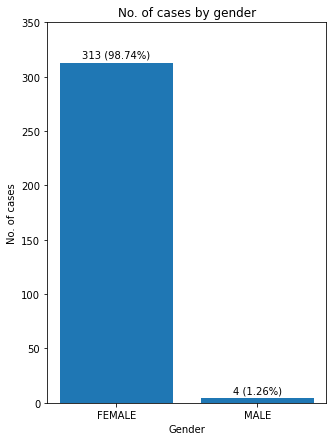

In [13]:
#cases by gender

plt.figure(figsize = (5,7))
gen_bar = plt.bar(gen['Gender'], gen['Total'])
plt.yticks(np.arange(0,400,50))
plt.bar_label(gen_bar, labels = ['{} ({:.2f}%)'.format(t,p) for t,p in zip(gen['Total'],gen['Percentage'])], padding = 3)
plt.xlabel('Gender')
plt.ylabel('No. of cases')
plt.title('No. of cases by gender')
plt.show()

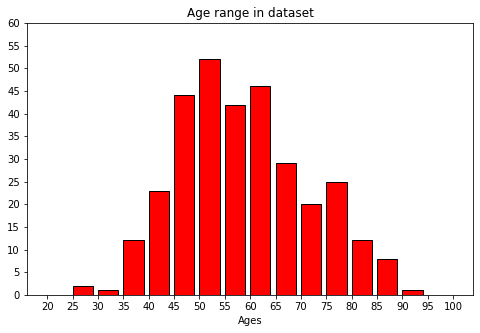

In [22]:
#find Age distribution in dataset

bins = list(range(20,105,5))

plt.figure(figsize = (8,5))
plt.hist(df['Age'].astype(int), width = 4, align = 'mid', bins = bins, color = 'red', edgecolor = 'black')
plt.xticks(bins)
plt.xlabel('Ages')
plt.title('Age range in dataset')
plt.yticks(np.arange(0,65,5))
plt.show()

In [17]:
cancer_types_total = df.groupby('Histology', as_index = False)['Age'].count()

In [18]:
cancer_types_total.rename(columns = {'Age': 'Total_Number'}, inplace = True)

In [19]:
# for scaling, we get the percentage of total cases for each type of case
totals_of_dataset = []
for hist, num in zip(cancer_types_total['Histology'], cancer_types_total['Total_Number']):
    answer = (num/df.shape[0]) * 100
    totals_of_dataset.append(answer)

In [20]:
cancer_types_total['Percentage'] = totals_of_dataset

In [21]:
cancer_types_total

,Histology,Total_Number,Percentage
0,Infiltrating Ductal Carcinoma,224,70.662461
1,Infiltrating Lobular Carcinoma,81,25.552050
2,Mucinous Carcinoma,12,3.785489


In [23]:
# From the table above, we see that there are 224 cases of Infiltrating Ductal Carcinoma, 81 cases of Infiltrating Lobular Carcinoma and only 12 cases of mucinous carcinoma.

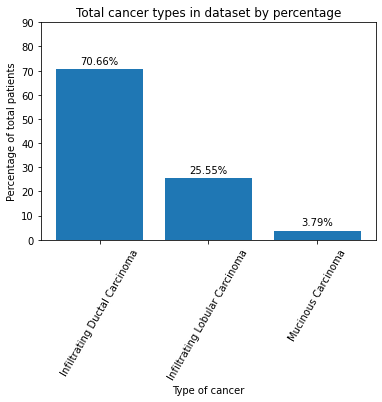

In [24]:
totals_bar = plt.bar(cancer_types_total['Histology'],cancer_types_total['Percentage'])
plt.xticks(rotation = 60)
plt.yticks(np.arange(0,100,10))
plt.xlabel('Type of cancer')
plt.ylabel('Percentage of total patients')
plt.title('Total cancer types in dataset by percentage')
plt.bar_label(totals_bar, labels = ['{:.2f}%'.format(t) for t in totals_bar.datavalues], padding = 3)
plt.show()

In [25]:
#stages of each cancer type
#group the cancer types by histology and stage, and count them
cancer_type_by_stage = (
    df
    .groupby(['Histology', 'Tumour_Stage'], as_index = False)
    .agg(Total = ('Age', 'count'))
)

In [26]:
cancer_type_by_stage

,Histology,Tumour_Stage,Total
0,Infiltrating Ductal Carcinoma,I,47
1,Infiltrating Ductal Carcinoma,II,120
2,Infiltrating Ductal Carcinoma,III,57
3,Infiltrating Lobular Carcinoma,I,10
4,Infiltrating Lobular Carcinoma,II,51
5,Infiltrating Lobular Carcinoma,III,20
6,Mucinous Carcinoma,I,3
7,Mucinous Carcinoma,II,9


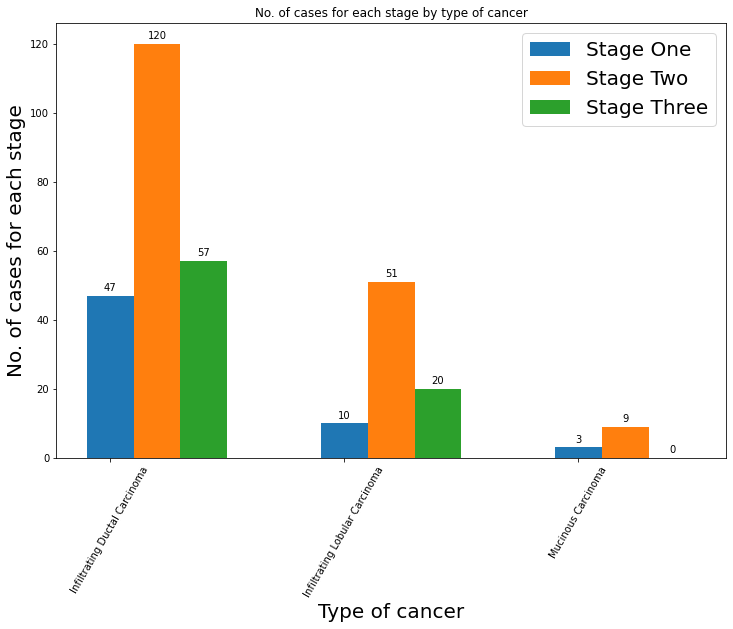

In [29]:
labels = list(cancer_type_by_stage['Histology'].unique())
x = np.arange(len(labels))
width = 0.2

# we create subplots, and set the size of the whole figure
fig, ax = plt.subplots(figsize = (12, 8))

# now we add the bar for each cancer type. Each plt describes each stage for one cancer type each.
plt1 = ax.bar(x, cancer_type_by_stage.loc[cancer_type_by_stage['Tumour_Stage'] == 'I', 'Total'], width = width, label = 'Stage One')
plt2 = ax.bar(x + width, cancer_type_by_stage.loc[cancer_type_by_stage['Tumour_Stage'] == 'II', 'Total'], width = width, label = 'Stage Two')
plt3 = ax.bar(x + width*2, cancer_type_by_stage.loc[cancer_type_by_stage['Tumour_Stage'] == 'III', 'Total'], width = width, label = 'Stage Three')

# we set where where the x values on the x-axis will be, and what their labels will be.
ax.set_xticks(x)
ax.set_xticklabels(labels)

# we put the the height of each bar on top of the bar, with some padding for neatness.
ax.bar_label(plt1, padding = 3)
ax.bar_label(plt2, padding = 3)
ax.bar_label(plt3, padding = 3)

plt.xlabel('Type of cancer', fontdict = {'fontsize': 20})
plt.ylabel('No. of cases for each stage', fontdict = {'fontsize': 20})
plt.title('No. of cases for each stage by type of cancer')

plt.legend(prop={'size': 20})
plt.xticks(rotation = 60)


plt.show()

In [37]:
#mortality rate 
#get the patient statuses and ages by age ranges, and put the subsets of data into a dictionary

cancer_mort_raw = {}
key = 0
for i in range(len(bins)):
    if i < len(bins) - 1:
        row = df.loc[(df['Age'] >= bins[i]) & (df['Age'] < bins[i + 1])][['Patient_Status', 'Age']]
        if row.empty is False:
            cancer_mort_raw.update({'{} to {}'.format(bins[i], bins[i + 1]):row })
            key += 1
    else:
        pass

In [38]:
#clean and rejoin subsets into dataframe 
cancer_mort_list = []

for key, val in cancer_mort_raw.items():
    age_range = key
    status_df = val.groupby('Patient_Status', as_index = False).count()
    status_vals = {}
    
    for ps, a in zip(status_df['Patient_Status'], status_df['Age']):
        status_vals.update({'Age_range': age_range, ps: a})
        
    cancer_mort_list.append(status_vals)

In [39]:
cancer_mort = pd.DataFrame(cancer_mort_list)
cancer_mort.fillna(0, inplace = True)

In [40]:
cancer_mort.head()


,Age_range,Alive,Dead
0,25 to 30,1.0,1.0
1,30 to 35,0.0,1.0
2,35 to 40,11.0,1.0
3,40 to 45,20.0,3.0
4,45 to 50,33.0,11.0


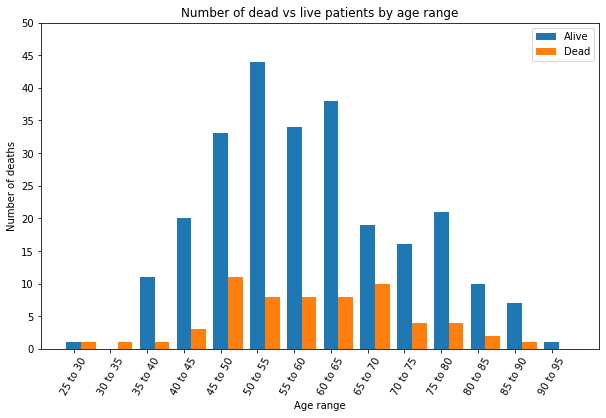

In [41]:
fig = plt.figure(figsize = (10,6))

age_range = list(cancer_mort['Age_range'])
x = np.arange(len(age_range))
width = 0.4

plt.bar(x, cancer_mort['Alive'], width = width, label = 'Alive')
plt.bar(x + width, cancer_mort['Dead'], width = width, label = 'Dead')
plt.xticks(x, rotation = 60, labels = age_range)
plt.yticks(np.arange(0, 55, 5))
plt.title('Number of dead vs live patients by age range')
plt.xlabel('Age range')
plt.ylabel('Number of deaths')

plt.legend()
plt.show()

In [42]:
#mortality rate by cancer type
cancer_types = (
    df
    .groupby(['Histology', 'Patient_Status'], as_index = False)
    .agg(Total = ('Age', 'count'))
)

In [43]:
cancer_types

,Histology,Patient_Status,Total
0,Infiltrating Ductal Carcinoma,Alive,179
1,Infiltrating Ductal Carcinoma,Dead,45
2,Infiltrating Lobular Carcinoma,Alive,67
3,Infiltrating Lobular Carcinoma,Dead,14
4,Mucinous Carcinoma,Alive,9
5,Mucinous Carcinoma,Dead,3


In [44]:
total_lesions = cancer_types_total['Total_Number'].sum()

ratios_by_type = []
ratios_by_total = []
for hist, pat_total in zip(cancer_types_total['Histology'], cancer_types_total['Total_Number']):
    results = cancer_types.loc[cancer_types['Histology'] == hist]
    
    for result in results['Total']:
        ratio_by_type = (result/pat_total)*100
        ratios_by_type.append(ratio_by_type)
        
        ratio_by_total = (result/total_lesions)*100
        ratios_by_total.append(ratio_by_total)

In [45]:
cancer_types['Ratio by cancer type (%)'] = ratios_by_type
cancer_types['Ratio by total (%)'] = ratios_by_total

In [46]:
cancer_types

,Histology,Patient_Status,Total,Ratio by cancer type (%),Ratio by total (%)
0,Infiltrating Ductal Carcinoma,Alive,179,79.910714,56.466877
1,Infiltrating Ductal Carcinoma,Dead,45,20.089286,14.195584
2,Infiltrating Lobular Carcinoma,Alive,67,82.716049,21.135647
3,Infiltrating Lobular Carcinoma,Dead,14,17.283951,4.416404
4,Mucinous Carcinoma,Alive,9,75.000000,2.839117
5,Mucinous Carcinoma,Dead,3,25.000000,0.946372


In [48]:
cancer_types_alive = cancer_types.loc[cancer_types['Patient_Status'] == 'Alive'].copy()
cancer_types_dead = cancer_types.loc[cancer_types['Patient_Status'] == 'Dead'].copy()

In [49]:
cancer_types_alive.reset_index(inplace = True)
cancer_types_alive.drop('index', axis = 1, inplace = True)

cancer_types_dead.reset_index(inplace = True)
cancer_types_dead.drop('index', axis = 1, inplace = True)

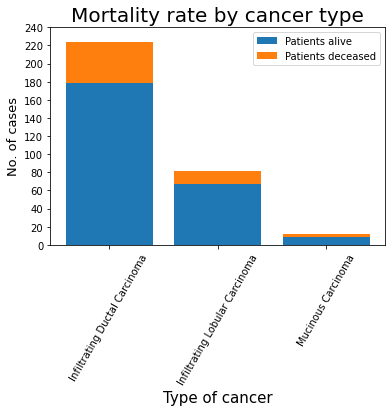

In [50]:
plt.bar(cancer_types_alive['Histology'], cancer_types_alive['Total'], label = 'Patients alive')
plt.bar(cancer_types_dead['Histology'], cancer_types_dead['Total'], bottom = cancer_types_alive['Total'], label = 'Patients deceased')

plt.xticks(rotation = 60)
plt.yticks(np.arange(0, 250, 20))
plt.ylabel('No. of cases', fontdict={'fontsize': 13})
plt.xlabel('Type of cancer', fontdict={'fontsize': 15})
plt.title('Mortality rate by cancer type', fontdict={'fontsize': 20})
plt.legend()

plt.show()

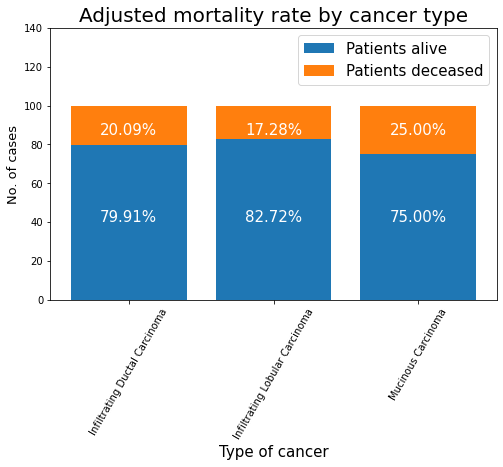

In [51]:
plt.figure(figsize = (8, 5))
counter = 0

plt.bar(cancer_types_alive['Histology'], cancer_types_alive['Ratio by cancer type (%)'], label = 'Patients alive')

for ind, value in zip(cancer_types_alive.index, cancer_types_alive['Ratio by cancer type (%)']):
    plt.text(ind, 40, '{:.2f}%'.format(value), horizontalalignment='center', fontdict={'fontsize': 15, 'color':'white'})

plt.bar(cancer_types_dead['Histology'], cancer_types_dead['Ratio by cancer type (%)'], bottom = cancer_types_alive['Ratio by cancer type (%)'], label = 'Patients deceased')

for ind, value in zip(cancer_types_dead.index, cancer_types_dead['Ratio by cancer type (%)']):
    plt.text(ind, 85, '{:.2f}%'.format(value), horizontalalignment='center', fontdict={'fontsize': 15, 'color':'white'})

plt.xticks(rotation = 60)
plt.yticks(np.arange(0, 150, 20))
plt.ylabel('No. of cases', fontdict={'fontsize': 13})
plt.xlabel('Type of cancer', fontdict={'fontsize': 15})
plt.title('Adjusted mortality rate by cancer type', fontdict={'fontsize': 20})


plt.legend(prop = {'size': 15})

plt.show()

In [52]:
#The adjusted mortality shows us that each cancer has roughly the same mortality rate - around 20%.